In [68]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point, Polygon, box
#import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

In [74]:
ins= pd.read_csv("allen.txt", sep='       ', header=0)
ins.head()
ins['Index  ---date--- --time--']= ins['Index  ---date--- --time--'].str[-19:]
ins['Index  ---date--- --time--'] = pd.to_datetime(ins['Index  ---date--- --time--'])
ins

/Users/amandaworthy/opt/anaconda3/envs/uwgda2022/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Index ---date--- --time--,WBGT,unit,Ta,unit.1,Tg,unit.2,RH,unit.3
0,2022-11-01 11:21:28,60.9,F,73.1,F,74.1,F,30.5,%
1,2022-11-01 11:21:56,61.0,F,73.3,F,74.3,F,30.4,%
2,2022-11-01 11:22:26,61.1,F,73.4,F,74.3,F,30.4,%
3,2022-11-01 11:22:56,61.1,F,73.5,F,74.4,F,30.2,%
4,2022-11-01 11:23:26,61.1,F,73.5,F,74.5,F,30.0,%
...,...,...,...,...,...,...,...,...,...
9995,2022-11-04 22:38:54,63.5,F,73.2,F,73.0,F,44.5,%
9996,2022-11-04 22:39:24,63.5,F,73.1,F,73.0,F,44.4,%
9997,2022-11-04 22:39:54,63.5,F,73.1,F,73.1,F,44.3,%
9998,2022-11-04 22:40:24,63.5,F,73.1,F,73.2,F,44.2,%


In [75]:
for col in ins.columns:
    print(col)

Index  ---date--- --time--
   WBGT
  unit
    Ta
  unit.1
    Tg
  unit.2
    RH
  unit.3


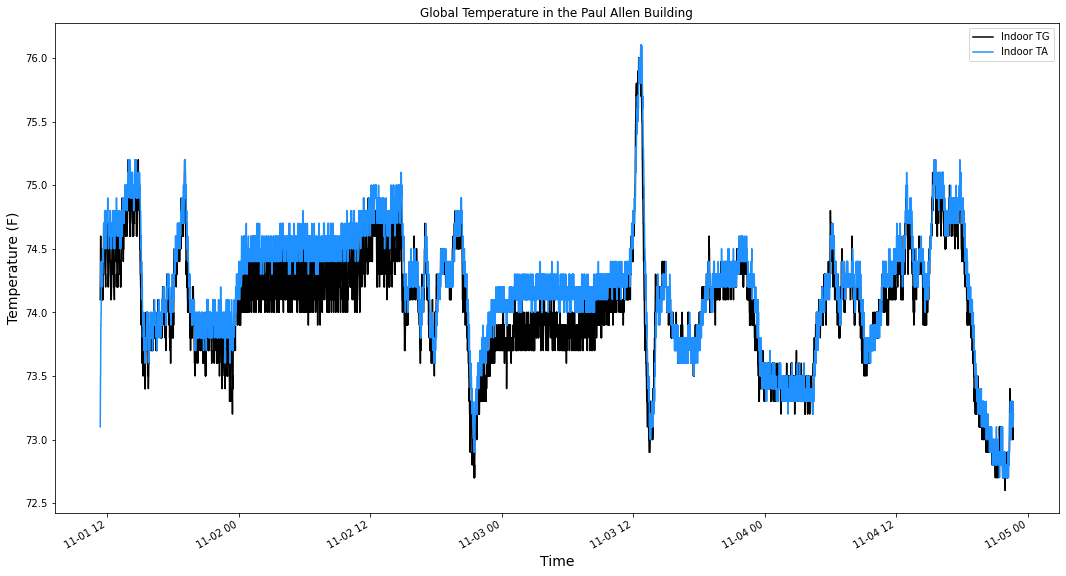

In [100]:
fig,ax = plt.subplots(figsize=(18,10))


ins.plot(x='Index  ---date--- --time--', y='    Tg',color='k', markerfacecolor='white', ax=ax, label = "Indoor TG",)
ins.plot(x='Index  ---date--- --time--', y='    Ta',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Indoor TA")



ax.set_title('Global Temperature in the Paul Allen Building')
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("Temperature (F)",color='k',fontsize=14);


In [77]:
UWASH= pd.read_csv("UWASH.2022-11-08.csv", sep=',', header=[10])
UWASH= UWASH.drop(0,axis=0)

In [99]:
UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time)
cols = UWASH.columns.drop(['Date_Time'])
UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')


UWASH.head() 

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,dew_point_temperature_set_1d
1,NaN,2022-11-01 12:55:00+00:00,44.0,NaN,0.0,NaN
2,NaN,2022-11-01 13:55:00+00:00,43.0,NaN,1.0,NaN
3,NaN,2022-11-01 14:55:00+00:00,44.0,NaN,0.0,NaN
4,NaN,2022-11-01 15:55:00+00:00,44.0,NaN,2.0,NaN
5,NaN,2022-11-01 16:55:00+00:00,47.0,NaN,0.0,NaN


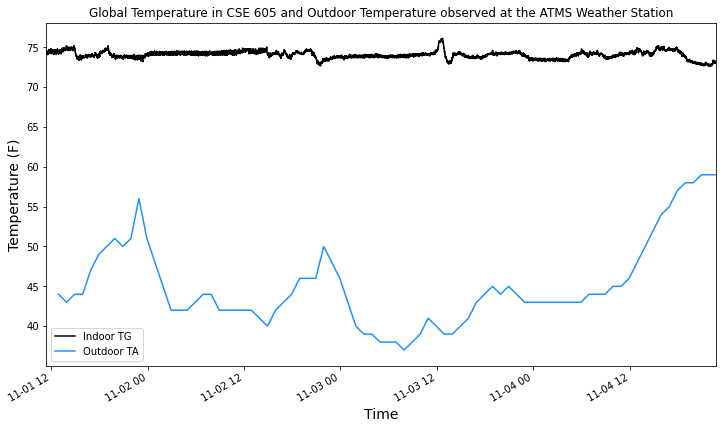

In [96]:
fig,ax = plt.subplots(figsize=(12,7))


#plot inside
ins.plot(x='Index  ---date--- --time--', y='    Tg',color='k', markerfacecolor='white', ax=ax, label = "Indoor TG",)
#ins.plot(x='Index  ---date--- --time--', y='    Ta',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Indoor TA")

#plot outside
UWASH.plot(x='Date_Time', y='air_temp_set_1',color='dodgerblue', markerfacecolor='white', ax=ax, label = "Outdoor TA")


ax.set_title('Global Temperature in CSE 605 and Outdoor Temperature observed at the ATMS Weather Station')
ax.set_xlabel("Time",fontsize=14)
ax.set_ylabel("Temperature (F)",color='k',fontsize=14);


ax.set_xlim(pd.Timestamp('2022-11-01 11:21:28'), pd.Timestamp('2022-11-04 22:40:54'));